In [202]:
import pandas as pd
import dtale
import statistics as st
import category_encoders as ce
from sklearn import preprocessing
import seaborn as sns

In [203]:
df = pd.read_csv('data/wine_cleared.zip')
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [204]:
df['price_round'] = df['price'].round().astype(int)

In [205]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)

In [206]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [207]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [208]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
df['old_wine'].sum()

39765

In [209]:
regex = '\((.*?)\)'
df['locality'] = df['title'].str.findall(regex).str.get(0)

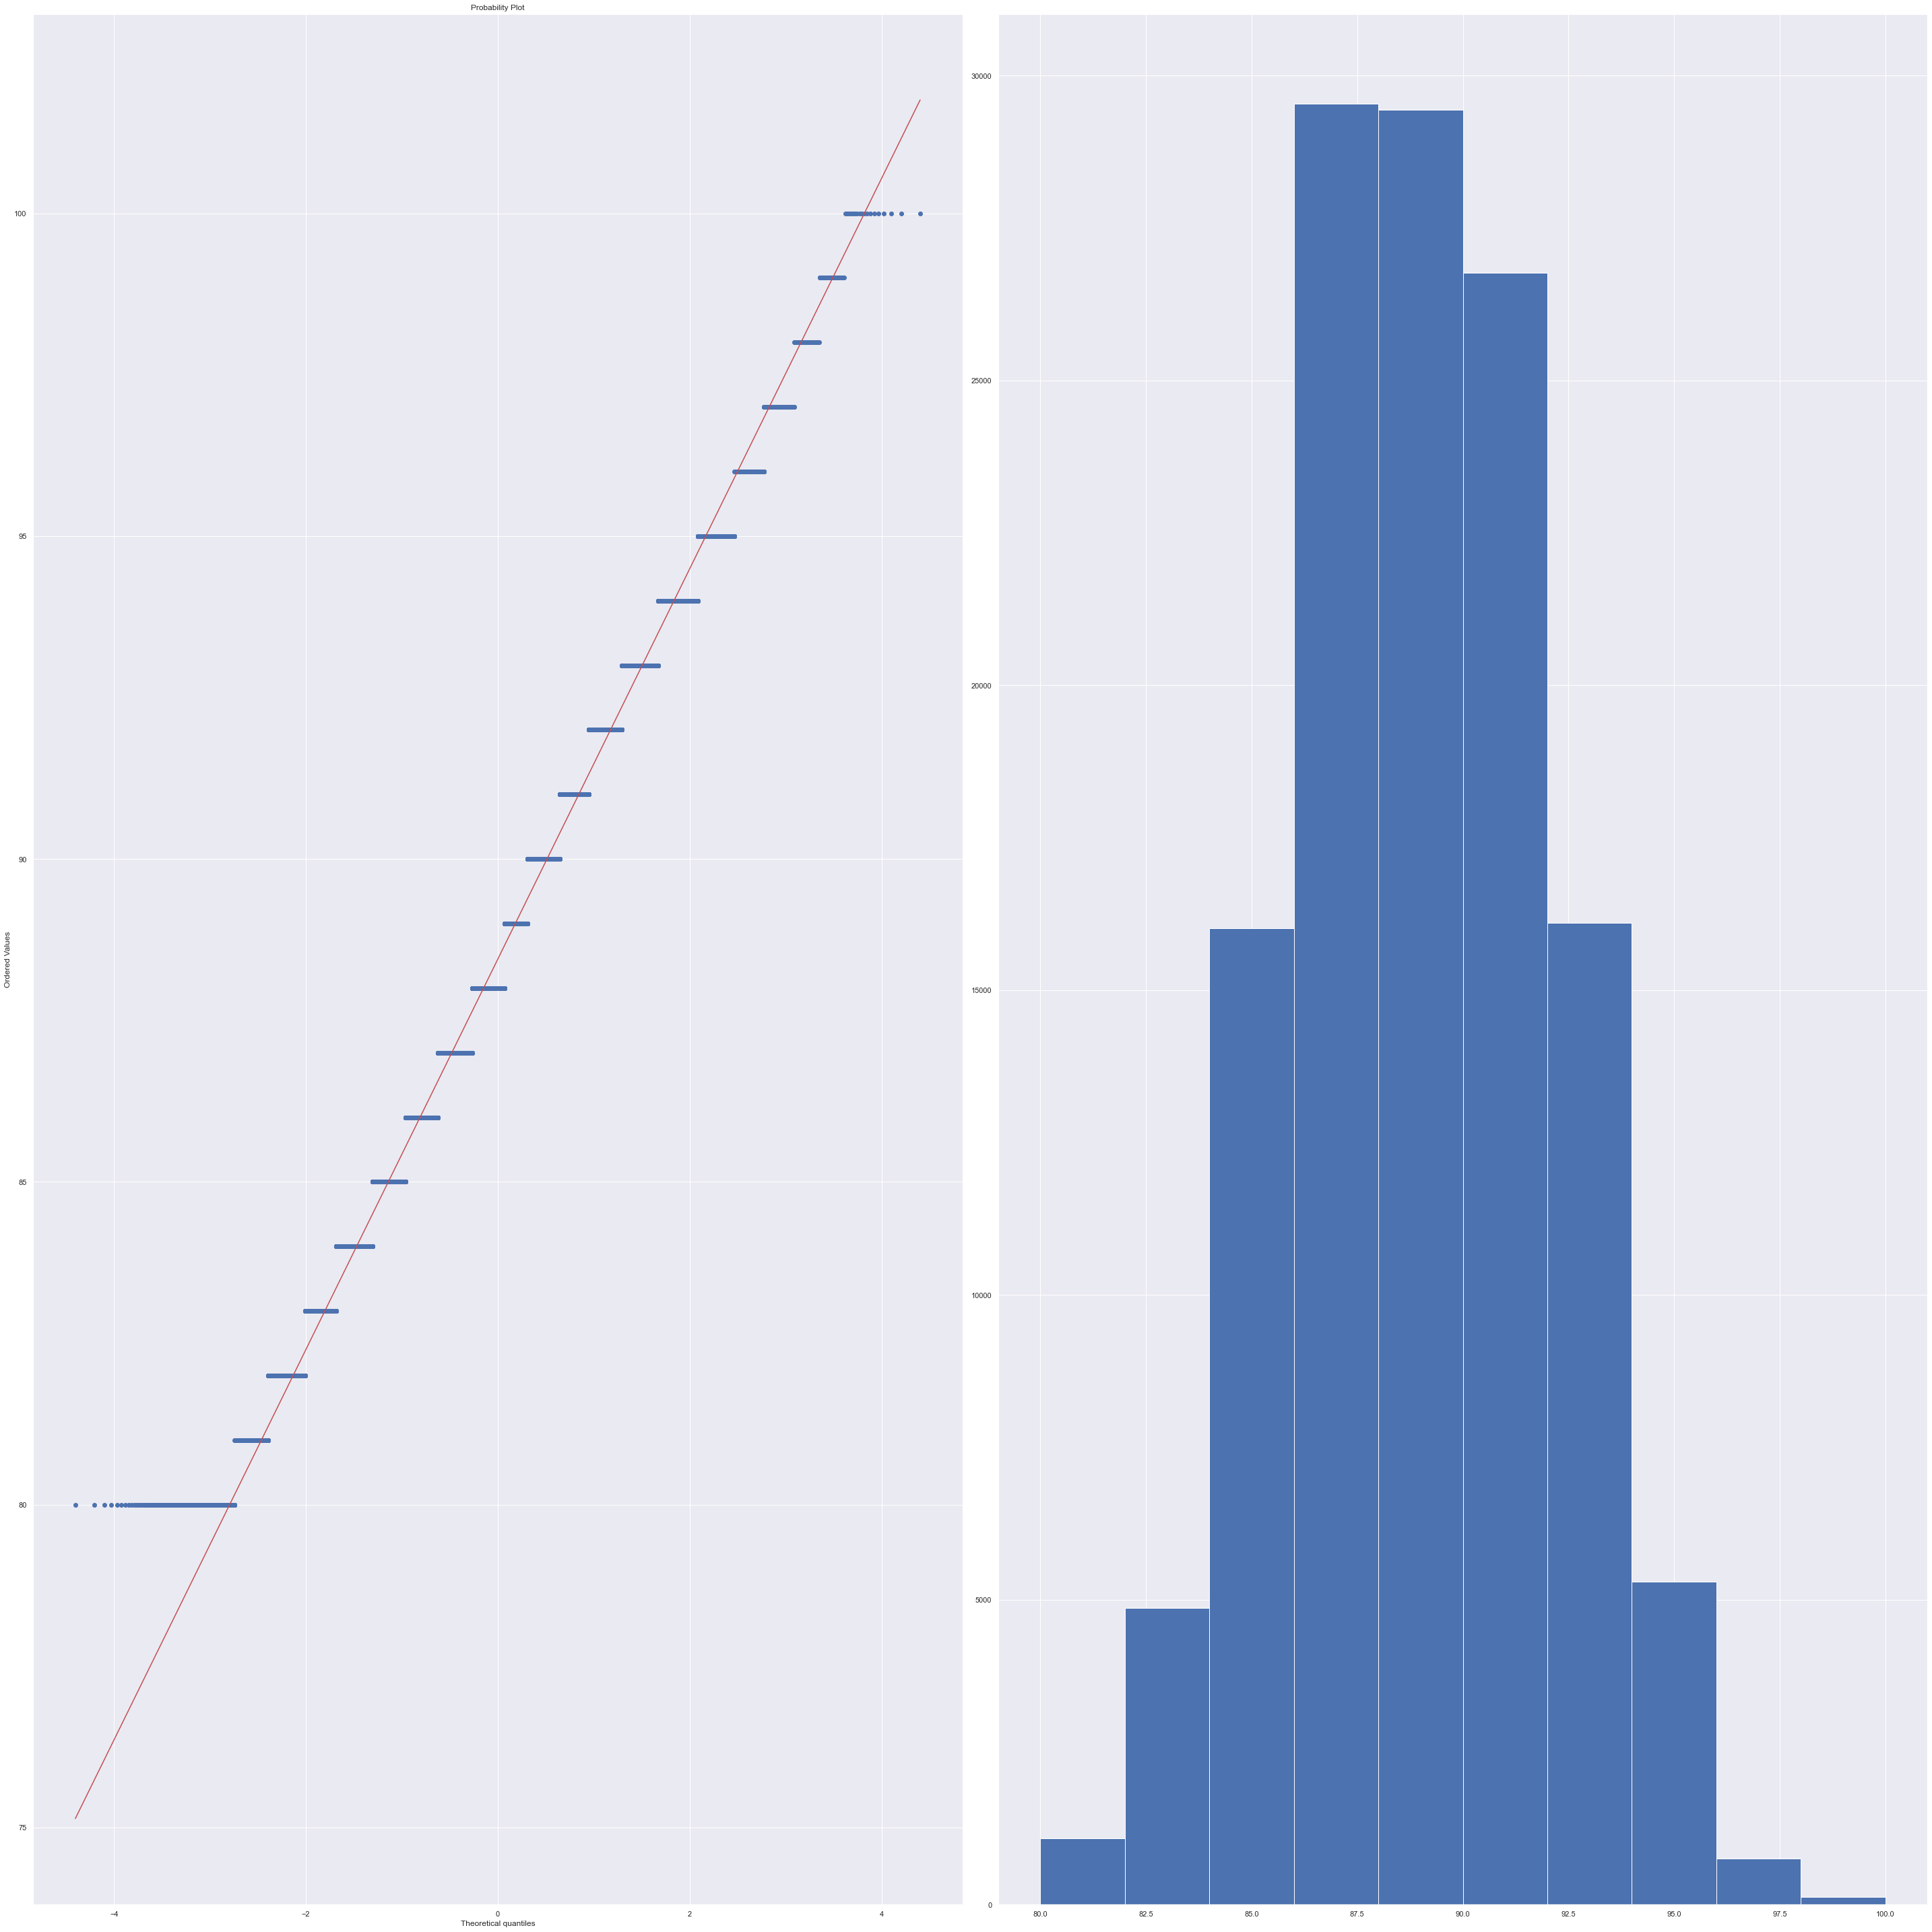

In [210]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [211]:
country_population = pd.read_csv('data/country_population.zip', sep=';')
country_population.head(2)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"


In [212]:
df = df.join(country_population.set_index('country'), on='country')
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"


In [213]:
country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area.head(2)

,country,area
0,Russia,17075400.0
1,Canada,9984670.0


In [214]:
df = df.join(country_area.set_index('country'), on='country')
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0


In [215]:
df = df.drop('Unnamed: 0', axis=1)
df.head(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0


In [216]:
df['years_diff'] = (pd.to_datetime('2022/01/12') - df['year']).dt.days
max(df.years_diff)

98627.0

In [217]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(df['year'])
data = pd.concat([df, year_col], axis=1)
data.head(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2


In [218]:
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df['taster_name'])
df = pd.concat([df, type_bin], axis=1)

<AxesSubplot: >

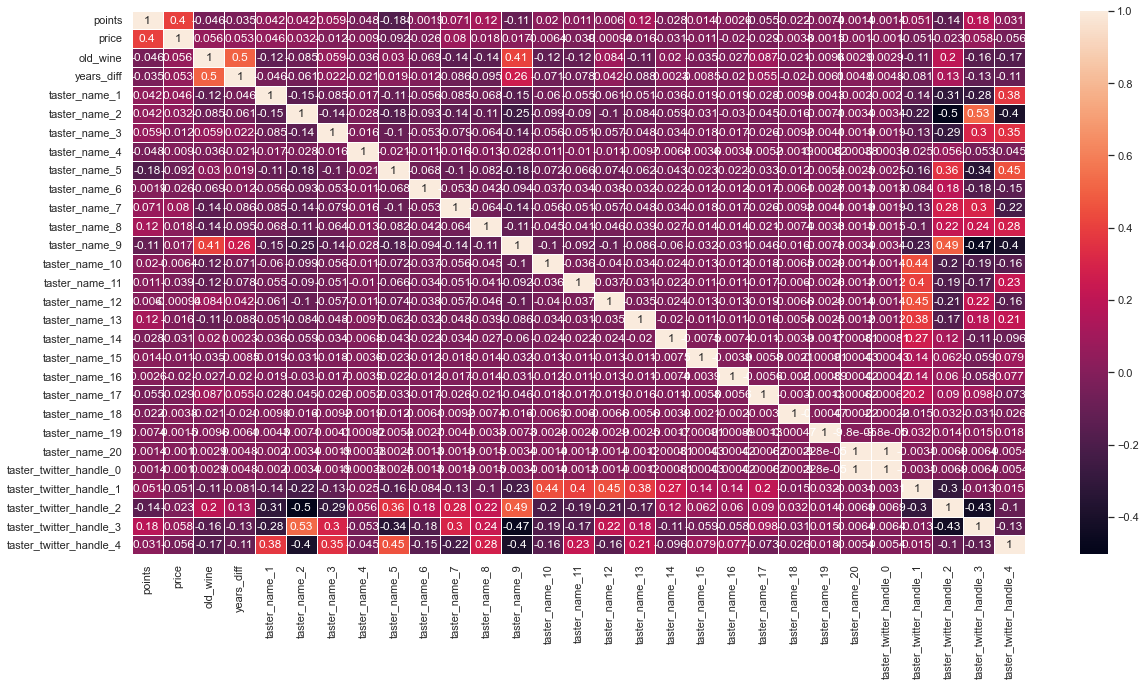

In [235]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


In [220]:
df = df.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

<AxesSubplot: >

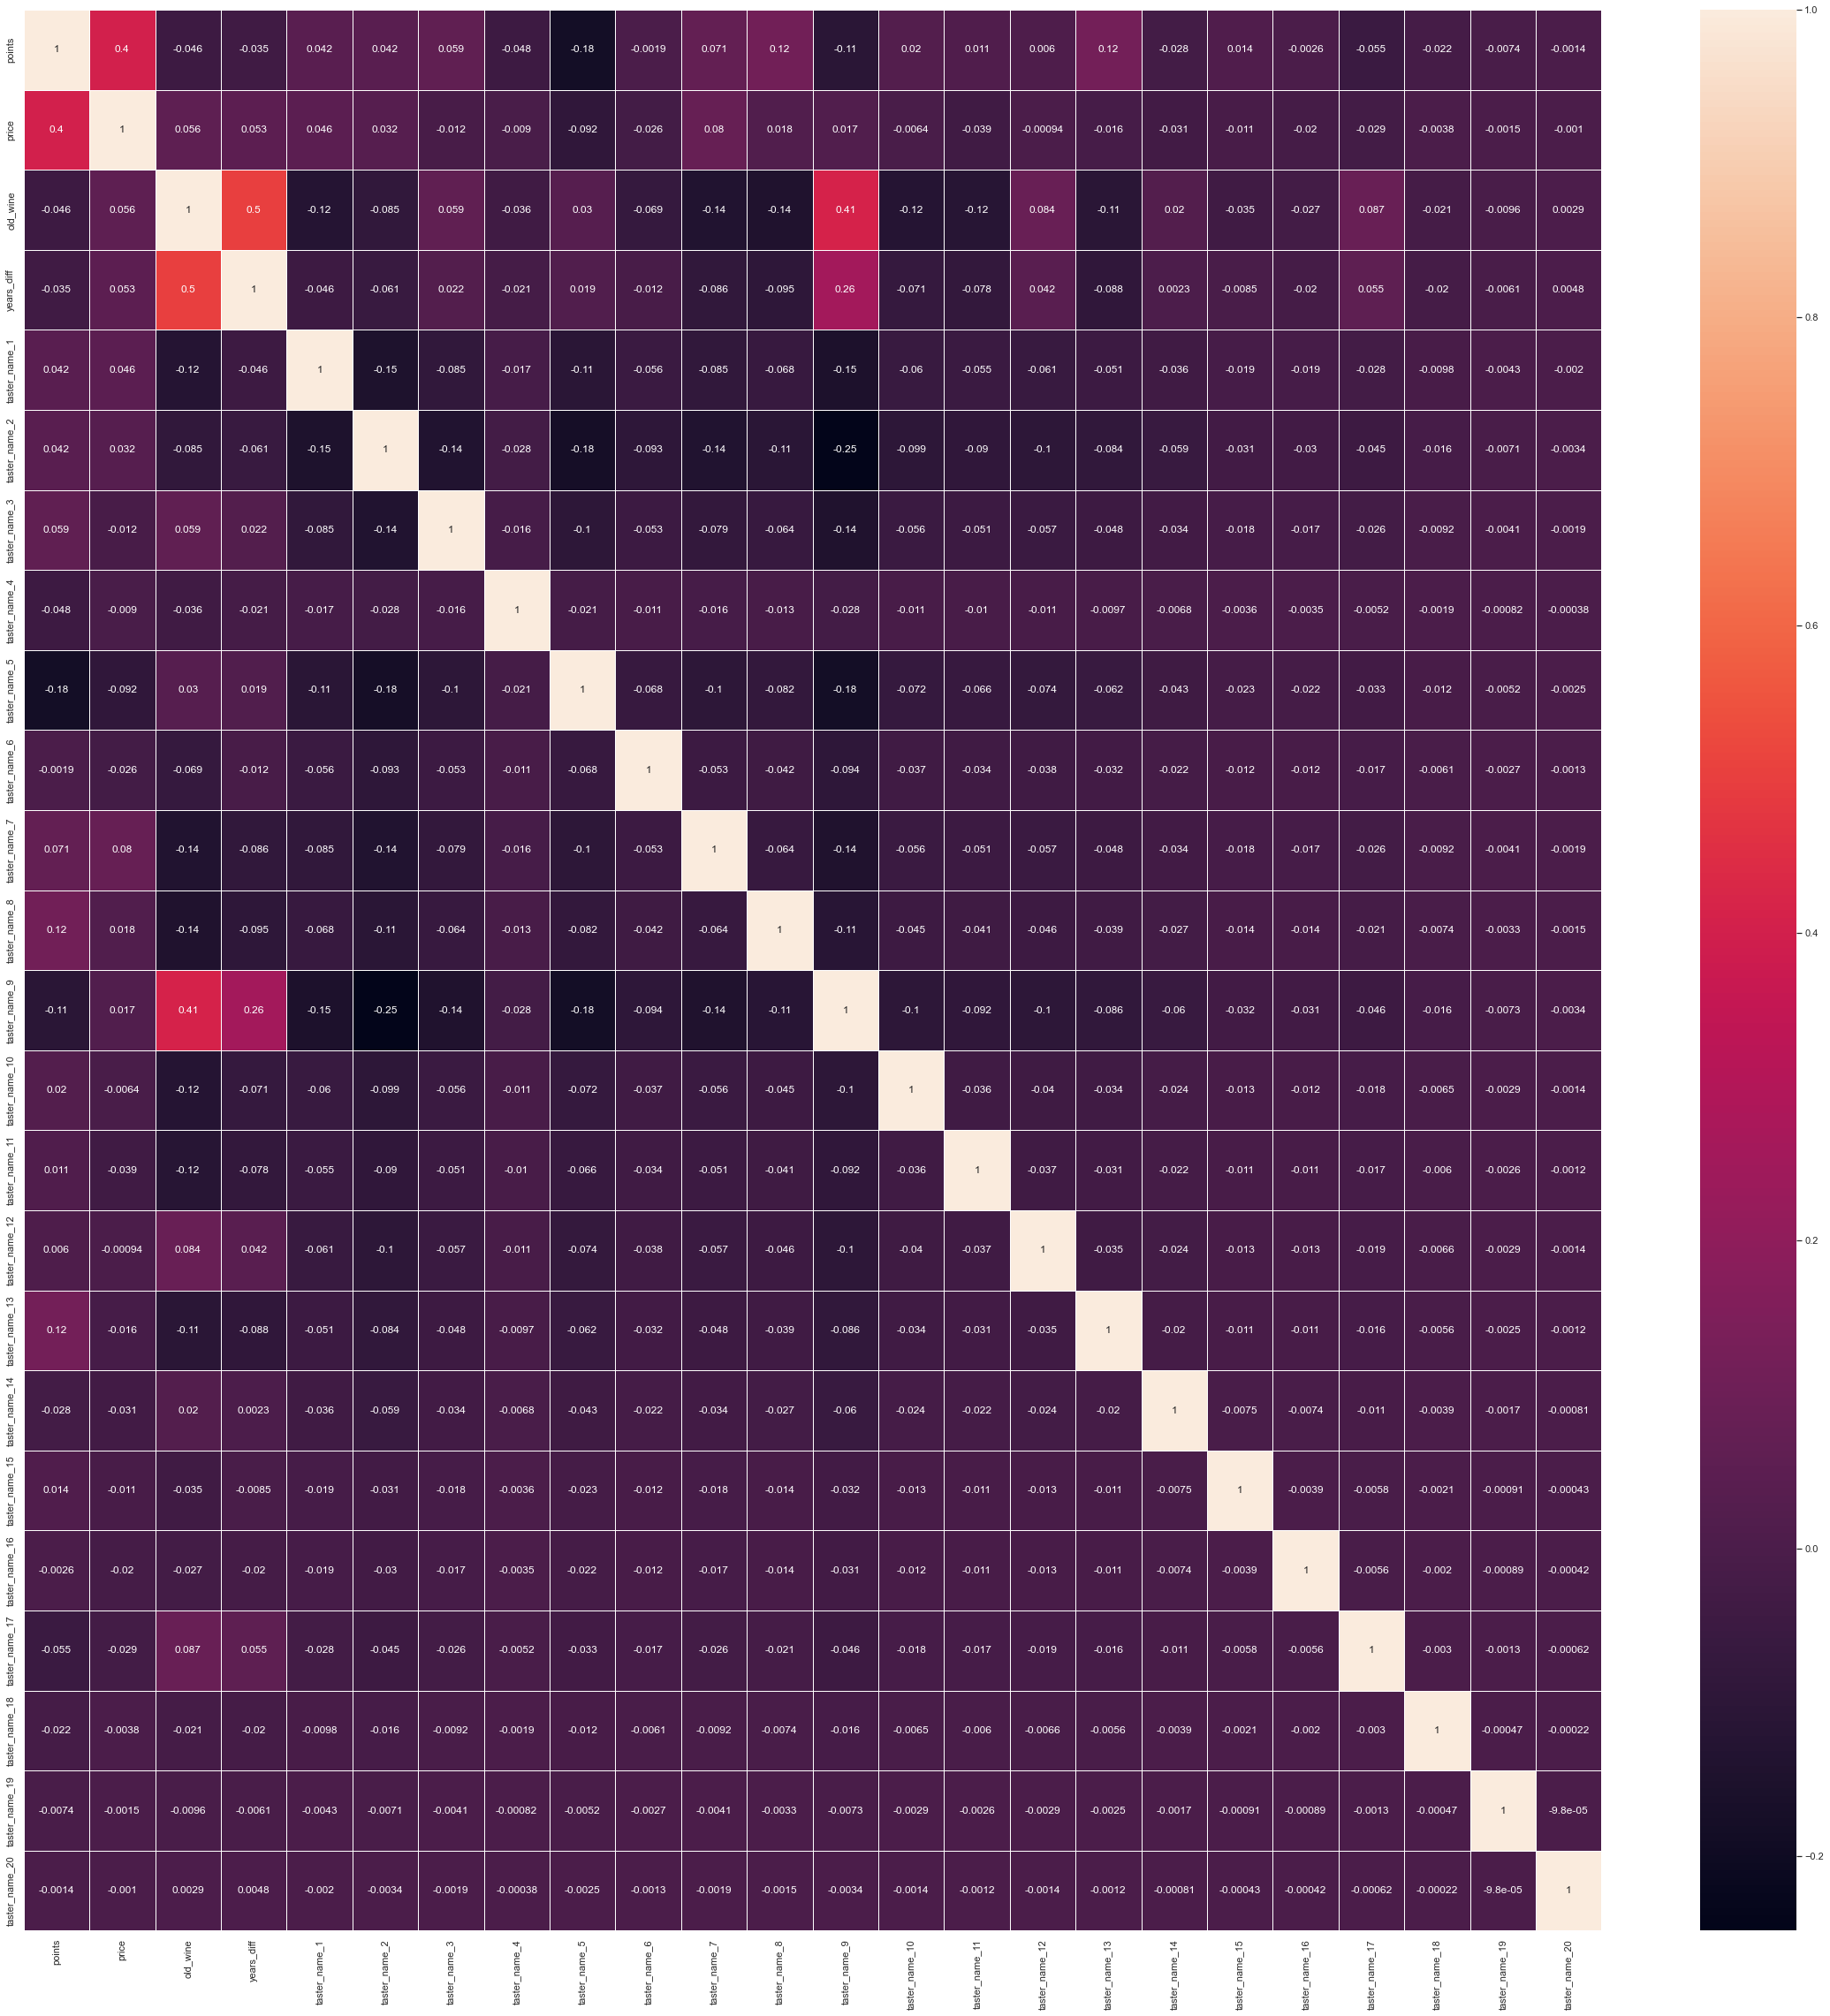

In [221]:
# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [222]:
n_col = len(df.columns)
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(df['taster_twitter_handle'])
df = pd.concat([df, type_bin], axis=1)
res = len(df.columns) - n_col
res

5

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='price', ylabel='Density'>

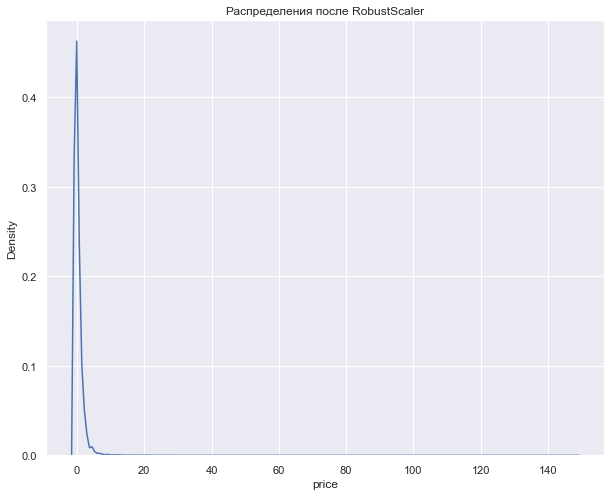

In [223]:
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df['price'] = r_scaler.fit_transform(df[['price']])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df['price'], ax=ax1)

In [224]:
s_scaler = preprocessing.StandardScaler()
# кодируем исходный датасет
df['price'] = s_scaler.fit_transform(df[['price']])
df['price'][129968]

-0.13551516993245466

In [225]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

In [226]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [227]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [228]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [229]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [230]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls.head(2)

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233


In [231]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [232]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


In [233]:
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_1,type_2,type_3,type_4,type_0,type_1,type_2
0,xxs,dress,1,0,0,0,0,0,1
1,xxs,skirt,0,1,0,0,0,1,0
2,xs,dress,1,0,0,0,0,0,1
3,s,skirt,0,1,0,0,0,1,0
4,m,dress,1,0,0,0,0,0,1
5,l,shirt,0,0,1,0,0,1,1
6,s,coat,0,0,0,1,1,0,0
7,m,coat,0,0,0,1,1,0,0
8,xxl,shirt,0,0,1,0,0,1,1
9,l,dress,1,0,0,0,0,0,1


In [ ]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [ ]:
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1
